In [14]:
import os
os.chdir("/content")
!rm -rf STAT-7220-Applied-Experimental-Design
print(os.getcwd())

/content


In [15]:
# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "t-pacheco"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/t-pacheco/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/t-pacheco/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

The objective of this experiment is to determine how aging time affects the bitterness of an IPA.


**Question 2.** Specify the outcome variable

The outcome variable is bitterness (IBU).

**Question 3.** Specify the independent variable. What are some possible lurking variables?

The independent variable is the aging time. Some possible lurking variables are...

**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

Since all of the IPAs are coming from the same batch, we have eliminated major lurking variables making a complete randomized design the best way to test for differences across the three levels of aging time.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null: The average IBU is equal for all aging times
$$ H_0: \mu_{\text{3 weeks}} = \mu_{\text{4 weeks}} = \mu_{\text{5 weeks}} $$

Alternative: The average IBU for at least two groups differ.
$$ H_1: \mu_{\text{3 weeks}} \neq \mu_{\text{4 weeks}} \neq \mu_{\text{5 weeks}}$$

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

Based on the EDA and summary statistics it appears that the IPAs aged for 3 weeks will have a different average bitterness than those aged for 4 and 5 weeks, therefore supporting the alternative hypothesis more.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
           mean        std
Weeks                     
3 Weeks  45.657   5.548563
4 Weeks  60.164  10.390411
5 Weeks  71.791  12.627946


/tmp/ipython-input-1482212201.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Weeks",y="IBU",data=ipa, palette="viridis")


Text(0, 0.5, 'Bitterness (IBU)')

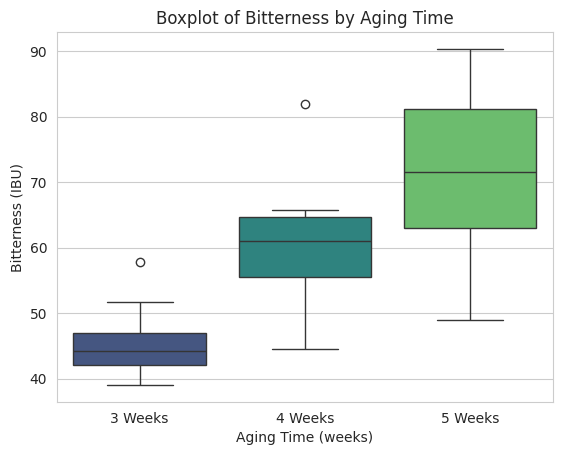

In [21]:
import pandas as pd

# read in the IPA dataset
ipa = pd.read_excel("IPA.xlsx")

# checking that it read in properly
ipa.info()

## EDA & SUMMARY STATISTICS

import seaborn as sns
import matplotlib.pyplot as plt

# getting mean IBU and std dev by aging time
summary_stats = ipa.groupby('Weeks')['IBU'].agg(['mean','std'])

print(summary_stats)

# boxplot of IBU by aging time
sns.set_style("whitegrid")

## Create boxplot using seaborn ##

sns.boxplot(x="Weeks",y="IBU",data=ipa, palette="viridis")

## Add Title and Labels using matplotlib ##

plt.title("Boxplot of Bitterness by Aging Time", loc='center')
plt.xlabel("Aging Time (weeks)")
plt.ylabel("Bitterness (IBU)")


**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.